In [32]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [34]:
a = load_obj('results/CD101T10_RIVAL2')
b = load_obj('results/CD101T10_RIVAL')

In [116]:
for i in range(len(a)):
    print(a[i]['val_accuracy'])

0.7582150101661682
0.7363083362579346
0.7481541633605957
0.7458012104034424
0.751156210899353


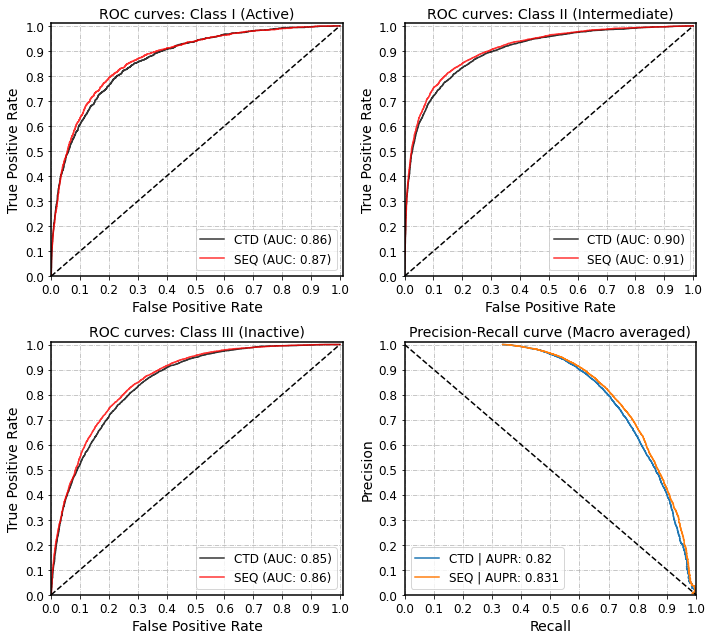

In [108]:
fig, ax = plt.subplots(2,2,figsize=(10,9))

#for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):

ax[0][0].plot(a[1]['fpr'][0], a[1]['tpr'][0], label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][0], alpha=0.8, color='black')
ax[0][0].plot(b[1]['fpr'][0], b[1]['tpr'][0], label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][0], alpha=0.8, color='red')

ax[0][0].plot([0, 1], [0, 1], 'k--')
ax[0][0].set_ylim([0.0, 1.01])
ax[0][0].set_xlim([0.0, 1.01])
ax[0][0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0][0].set_xticks(np.arange(0, 1.1, 0.1))
ax[0][0].set_title('ROC curves: Class I (Active)', fontsize=14)
ax[0][0].set_xlabel('False Positive Rate', fontsize=14)
ax[0][0].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[0][0].tick_params(axis="x", labelsize=12)
ax[0][0].tick_params(axis="y", labelsize=12) 
ax[0][0].grid(linestyle='-.', linewidth=0.7)
ax[0][0].legend(fontsize=12)

# for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):
#     ax[0][1].plot(a[0]['fpr'][i], a[0]['tpr'][i], label=activity+' (AUC: %0.2f)' % a[0]['roc_auc'][i], alpha=1)
ax[0][1].plot(a[1]['fpr'][1], a[1]['tpr'][1], label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][1], alpha=0.8, color='black')
ax[0][1].plot(b[1]['fpr'][1], b[1]['tpr'][1], label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][1], alpha=0.8, color='red')
ax[0][1].plot([0, 1], [0, 1], 'k--')
ax[0][1].set_ylim([0.0, 1.01])
ax[0][1].set_xlim([0.0, 1.01])
ax[0][1].set_yticks(np.arange(0, 1.1, 0.1))
ax[0][1].set_xticks(np.arange(0, 1.1, 0.1))
ax[0][1].set_title('ROC curves: Class II (Intermediate)', fontsize=14)
ax[0][1].set_xlabel('False Positive Rate', fontsize=14)
ax[0][1].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[0][1].tick_params(axis="x", labelsize=12)
ax[0][1].tick_params(axis="y", labelsize=12) 
ax[0][1].grid(linestyle='-.', linewidth=0.7)
ax[0][1].legend(fontsize=12)

# for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):
#     ax[1][0].plot(a[0]['fpr'][i], a[0]['tpr'][i], label=activity+' (AUC: %0.2f)' % a[0]['roc_auc'][i], alpha=1)
ax[1][0].plot(a[1]['fpr'][2], a[1]['tpr'][2], label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][2], alpha=0.8, color='black')
ax[1][0].plot(b[1]['fpr'][2], b[1]['tpr'][2], label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][2], alpha=0.8, color='red')
ax[1][0].plot([0, 1], [0, 1], 'k--')
ax[1][0].set_ylim([0.0, 1.01])
ax[1][0].set_xlim([0.0, 1.01])
ax[1][0].set_yticks(np.arange(0, 1.1, 0.1))
ax[1][0].set_xticks(np.arange(0, 1.1, 0.1))
ax[1][0].set_title('ROC curves: Class III (Inactive)', fontsize=14)
ax[1][0].set_xlabel('False Positive Rate', fontsize=14)
ax[1][0].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[1][0].tick_params(axis="x", labelsize=12)
ax[1][0].tick_params(axis="y", labelsize=12) 
ax[1][0].grid(linestyle='-.', linewidth=0.7)
ax[1][0].legend(fontsize=12)

l1 = ax[1][1].step(a[1]['precision']['micro'], a[1]['recall']['micro'], where='post', label='CTD | AUPR: '+str(np.round(a[1]['average_precision']['micro'],3)))
l2 = ax[1][1].step(b[1]['precision']['micro'], b[1]['recall']['micro'], where='post', label='SEQ | AUPR: '+str(np.round(b[1]['average_precision']['micro'],3)))
ax[1][1].set_xlabel('Recall', fontsize=14)
ax[1][1].set_ylabel('Precision', fontsize=14)
ax[1][1].plot([0, 1], [1, 0], 'k--')
ax[1][1].set_ylim([0.0, 1.01])
ax[1][1].set_xlim([0.0, 1.00])
ax[1][1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1][1].set_xticks(np.arange(0, 1.1, 0.1))
ax[1][1].set_title('Precision-Recall curve (Macro averaged)', fontsize=14)
ax[1][1].tick_params(axis="x", labelsize=12)
ax[1][1].tick_params(axis="y", labelsize=12) 
ax[1][1].grid(linestyle='-.', linewidth=0.7)
ax[1][1].legend(fontsize=12)

for axis in ax.flatten():
    for dir in ['top','bottom','left','right']:
        axis.spines[dir].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('plots/comparision_ROC_PR.png', dpi=500, format = 'png', bbox_inches='tight')